In [177]:
import os
from PIL import Image, ImageOps, ImageDraw
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import numpy.ma as ma
from datetime import datetime
import pandas as pd

In [178]:
data_dir='/home/ajai-krishna/work/Phenocam_d3/Phenocamdata'
file_path=[os.path.join(data_dir,i) for i in os.listdir(data_dir)]
file_path

['/home/ajai-krishna/work/Phenocam_d3/Phenocamdata/APU_pos_01_2025_08_10_11_20_45_NDVI(5).jpg',
 '/home/ajai-krishna/work/Phenocam_d3/Phenocamdata/APU_pos_01_2025_10_02_11_30_14.jpg',
 '/home/ajai-krishna/work/Phenocam_d3/Phenocamdata/APU_pos_01_2025_08_25_11_20_48_NDVI(1).jpg',
 '/home/ajai-krishna/work/Phenocam_d3/Phenocamdata/APU_pos_01_2025_10_05_11_31_05_NDVI.jpg',
 '/home/ajai-krishna/work/Phenocam_d3/Phenocamdata/APU_pos_01_2025_09_09_11_20_14.jpg',
 '/home/ajai-krishna/work/Phenocam_d3/Phenocamdata/APU_pos_01_2025_11_13_11_21_03_NDVI.jpg',
 '/home/ajai-krishna/work/Phenocam_d3/Phenocamdata/APU_pos_01_2025_10_30_11_00_15.jpg',
 '/home/ajai-krishna/work/Phenocam_d3/Phenocamdata/APU_pos_01_2025_11_04_11_10_14.jpg',
 '/home/ajai-krishna/work/Phenocam_d3/Phenocamdata/APU_pos_01_2025_10_29_11_21_02_NDVI.jpg',
 '/home/ajai-krishna/work/Phenocam_d3/Phenocamdata/APU_pos_01_2025_10_08_11_30_14.jpg',
 '/home/ajai-krishna/work/Phenocam_d3/Phenocamdata/APU_pos_01_2025_10_28_11_00_14.jpg',
 

In [267]:
df1 = pd.DataFrame(file_path, columns=['file_path'])
df1['image_type'] = df1['file_path'].apply(lambda x: 'rgb' if x.lower().endswith('_color.jpg') else ('ir' if x.lower().endswith('_ir.jpg') else 'other'))
df1['date_time'] = df1['file_path'].apply(lambda x: os.path.basename(x).split('APU_pos_01_')[-1].rsplit('_', 1)[0])
#df1['datetime_obj'] = pd.to_datetime(df1['date_time'], format='%Y_%m_%d_%H%M%S')
df1['date'] = df1['date_time'].apply(lambda x: "_".join(x.split('_')[0:3]))
df1['time'] = df1['date_time'].apply(lambda x: "".join(x.split('_')[3:][:2]))
#df1['time'] = pd.to_datetime(df1['time'], format='%H%M').dt.time
df1

,file_path,image_type,date_time,date,time
0,/home/ajai-krishna/work/Phenocam_d3/Phenocamda...,other,2025_08_10_11_20_45,2025_08_10,1120
1,/home/ajai-krishna/work/Phenocam_d3/Phenocamda...,other,2025_10_02_11_30,2025_10_02,1130
2,/home/ajai-krishna/work/Phenocam_d3/Phenocamda...,other,2025_08_25_11_20_48,2025_08_25,1120
3,/home/ajai-krishna/work/Phenocam_d3/Phenocamda...,other,2025_10_05_11_31_05,2025_10_05,1131
4,/home/ajai-krishna/work/Phenocam_d3/Phenocamda...,other,2025_09_09_11_20,2025_09_09,1120
...,...,...,...,...,...
1398,/home/ajai-krishna/work/Phenocam_d3/Phenocamda...,other,2025_09_11_11_30,2025_09_11,1130
1399,/home/ajai-krishna/work/Phenocam_d3/Phenocamda...,rgb,2025_08_25_11_30_50,2025_08_25,1130
1400,/home/ajai-krishna/work/Phenocam_d3/Phenocamda...,ir,2025_08_25_11_20_48,2025_08_25,1120
1401,/home/ajai-krishna/work/Phenocam_d3/Phenocamda...,other,2025_09_08_11_21_13,2025_09_08,1121


In [265]:
dates = df1['date'].unique()
selected_fils = []
for date in dates:
    group = df1[df1['date'] == date]
    ir_times = group[group['image_type'] == 'ir']['time'].values
    rgb_times = group[group['image_type'] == 'rgb']['time'].values
    common_times = set(ir_times).intersection(set(rgb_times))
    time1 = common_times.pop() if common_times else None
    if time1:
        ir_file = group[(group['image_type'] == 'ir') & (group['time'] == time1)]['file_path'].values[0]
        rgb_file = group[(group['image_type'] == 'rgb') & (group['time'] == time1)]['file_path'].values[0]
        selected_fils.append({'date': date, 
                              'time': time1, 
                              'ir_file':ir_file, 
                              'rgb_file':rgb_file})


In [269]:
df=pd.DataFrame(selected_fils).sort_values(by=['date','time']).reset_index(drop=True)
df

,date,time,ir_file,rgb_file
0,2025_08_08,1110,/home/ajai-krishna/work/Phenocam_d3/Phenocamda...,/home/ajai-krishna/work/Phenocam_d3/Phenocamda...
1,2025_08_09,1100,/home/ajai-krishna/work/Phenocam_d3/Phenocamda...,/home/ajai-krishna/work/Phenocam_d3/Phenocamda...
2,2025_08_10,1100,/home/ajai-krishna/work/Phenocam_d3/Phenocamda...,/home/ajai-krishna/work/Phenocam_d3/Phenocamda...
3,2025_08_11,1100,/home/ajai-krishna/work/Phenocam_d3/Phenocamda...,/home/ajai-krishna/work/Phenocam_d3/Phenocamda...
4,2025_08_12,1100,/home/ajai-krishna/work/Phenocam_d3/Phenocamda...,/home/ajai-krishna/work/Phenocam_d3/Phenocamda...
...,...,...,...,...
59,2025_11_12,1121,/home/ajai-krishna/work/Phenocam_d3/Phenocamda...,/home/ajai-krishna/work/Phenocam_d3/Phenocamda...
60,2025_11_13,1121,/home/ajai-krishna/work/Phenocam_d3/Phenocamda...,/home/ajai-krishna/work/Phenocam_d3/Phenocamda...
61,2025_11_14,1121,/home/ajai-krishna/work/Phenocam_d3/Phenocamda...,/home/ajai-krishna/work/Phenocam_d3/Phenocamda...
62,2025_11_15,1121,/home/ajai-krishna/work/Phenocam_d3/Phenocamda...,/home/ajai-krishna/work/Phenocam_d3/Phenocamda...


In [256]:

def select_time(group):
    ir_time = group[group['image_type'] == 'ir']['time'].values
    rgb_df = group[group['image_type'] == 'rgb']['time'].values
    for time1 in ir_time:
        if time1 in rgb_df:
            return time1    

df1['temp']= df1.groupby(['date']).apply(select_time)

/tmp/ipykernel_7237/187874625.py:8: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df1['temp']= df1.groupby(['date']).apply(select_time)


In [258]:
df1['temp'].unique()

array([nan], dtype=object)

In [ ]:
def ndvi_calculation(ir_image, rgb_image):
    ir = np.array(ir_image).astype(float)
    rgb = np.array(rgb_image).astype(float)
    r = rgb[:,:,0]
    ndvi = np.mean((ir - r) / (ir + r))
    return ndvi




In [ ]:

def select_data(group):
    ir_image_path = group[group['image_type'] == 'ir']['file_path'].values
    rgb_image_path = group[group['image_type'] == 'rgb']['file_path'].values
    ir_time=group[group['image_type'] == 'ir']['time'].values
    
df1.groupby('date').apply(select_data)

AttributeError: 'DataFrameGroupBy' object has no attribute 'list'

In [ ]:
test_image_ir='/home/ajai-krishna/work/Phenocam_d3/Phenocamdata/APU_pos_01_2025_07_28_13_44_47_ir(1).jpg'
# test_image_color='/home/ajai-krishna/work/Phenocam_d3/Phenocamdata/APU_pos_01_2025_07_28_13_42_14(1).jpg'
test_image_color='/home/ajai-krishna/work/Phenocam_d3/Phenocamdata/APU_pos_01_2025_07_28_13_44_47_color(1).jpg'
img_ir= Image.open(test_image_ir)   
img_color=Image.open(test_image_color)
img_ir.load()
img_color.load()
# img
#img_ir = np.mean(img_ir,axis=3

In [ ]:
mean_ir = np.mean(np.array(img_ir).astype(float),axis=2)
mean_vis = np.mean(np.array(img_color).astype(float),axis=2)

In [ ]:
len(image_data_sorted),len(image_data)

(1298, 1298)

plt.hist(mean_vis)

In [ ]:
ndvi_vis = (mean_ir - mean_vis)/(mean_vis+mean_ir)

(array([7.20000e+01, 3.73000e+02, 8.45000e+02, 3.46100e+03, 2.85500e+04,
        3.88330e+04, 7.43800e+04, 6.86720e+04, 1.27317e+05, 1.47531e+05,
        9.43930e+04, 1.84974e+05, 9.34040e+04, 2.07299e+05, 2.06257e+05,
        2.53021e+05, 1.71632e+05, 1.51425e+05, 2.61258e+05, 1.58304e+05,
        2.24621e+05, 1.55047e+05, 2.10890e+05, 1.29149e+05, 1.86370e+05,
        1.01222e+05, 1.31058e+05, 1.49544e+05, 8.31530e+04, 1.26801e+05,
        7.18360e+04, 1.11367e+05, 7.81440e+04, 9.16090e+04, 4.90360e+04,
        5.08390e+04, 6.97500e+04, 4.65870e+04, 5.67320e+04, 3.02260e+04,
        4.83590e+04, 3.01100e+04, 4.09760e+04, 2.68460e+04, 2.16420e+04,
        3.29700e+04, 2.10920e+04, 2.80680e+04, 1.68800e+04, 2.33250e+04,
        1.35980e+04, 1.94680e+04, 1.24420e+04, 1.06020e+04, 1.51370e+04,
        9.03400e+03, 1.26540e+04, 8.08900e+03, 1.08700e+04, 6.46400e+03,
        9.19500e+03, 5.79700e+03, 5.21800e+03, 7.26000e+03, 4.38800e+03,
        6.37800e+03, 3.90900e+03, 5.66900e+03, 3.67

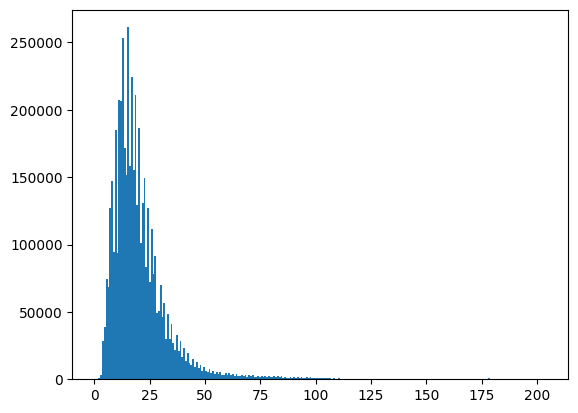

In [ ]:
plt.hist(mean_vis.flatten(),bins=250)

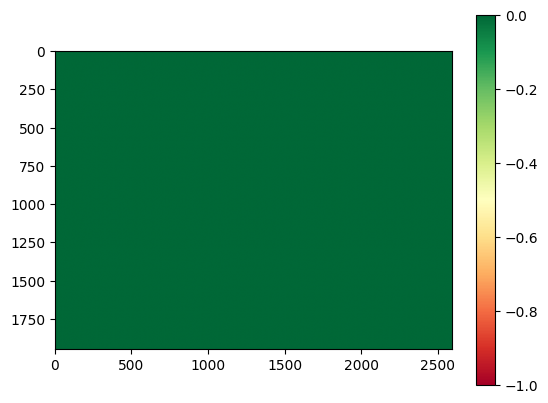

In [ ]:
plt.imshow(ndvi_vis*(ndvi_vis < 0) ,
           cmap='RdYlGn')
plt.colorbar()
Image.fromarray(ndvi_vis).save("/home/ajai-krishna/work/Phenocam_d3/static/images/test_ndvi.tif")

In [ ]:
# Convert images to grayscale (returns new images)
# img_ir = img_ir.convert('L')
# img_color = img_color.convert('RGB')  # Keep color as RGB to extract red channel

# Convert to numpy arrays
img_ir_array = np.array(img_ir)
img_color_array = np.array(img_color)

# Convert to float for calculation
img_ir = img_ir_array[:, :, 0].astype(float)
img_r = img_color_array[:, :, 0].astype(float)

/tmp/ipykernel_7237/562968272.py:3: RuntimeWarning: invalid value encountered in divide
  ndvi = np.where(denominator != 0, (img_ir - img_r) / denominator, 0)


Text(0.5, 1.0, 'NDVI')

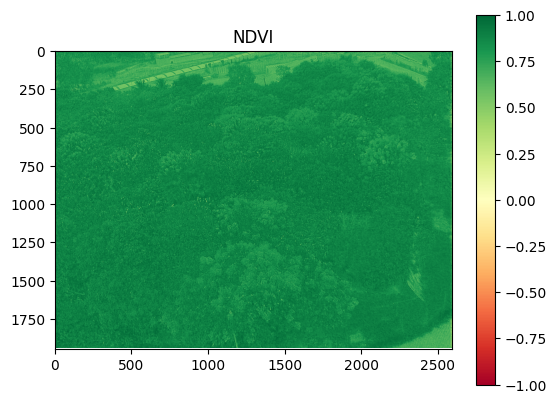

In [ ]:


# Calculate NDVI with division by zero handling
denominator = img_ir + img_r
ndvi = np.where(denominator != 0, (img_ir - img_r) / denominator, 0)

# Display NDVI
plt.imshow(ndvi, cmap='RdYlGn',vmin=-1)  # Use appropriate colormap for NDVI
plt.colorbar()
plt.title('NDVI')

In [ ]:
img_ir.shape,img_r.shape


((1944, 2592), (1944, 2592))

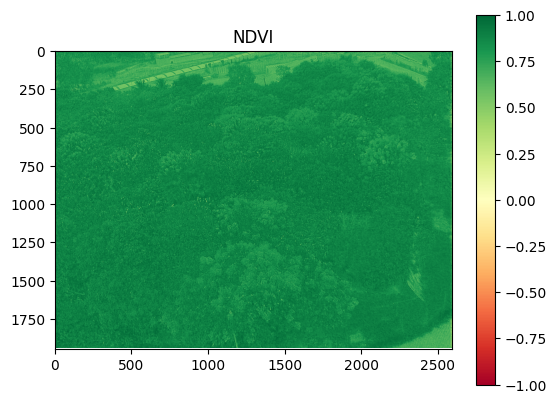

(1944, 2592)

In [ ]:
neg_ndvi = ndvi*ndvi<0
plt.imshow(ndvi, cmap='RdYlGn')  # Use appropriate colormap for NDVI
plt.colorbar()
plt.title('NDVI')
# plt.savefig('/home/ajai-krishna/work/Phenocam_d3/static/images/test_ndvi.png',dpi=600)
plt.show()
# Image.fromarray(ndvi).save("/home/ajai-krishna/work/Phenocam_d3/static/images/test_ndvi.tif")
ndvi.shape

In [ ]:
np.sum(ndvi== 1)

np.int64(65363)

In [ ]:
mask = '/home/ajai-krishna/work/Phenocam_d3/Phenocamdata/mask.jpg'
mask_img = Image.open(mask)

# Convert mask to grayscale ('L' mode) if it isn't already
mask_img = mask_img.convert('L')

# Resize mask to match image dimensions if needed
if mask_img.size != img_ir.size:
    mask_img = mask_img.resize(img_ir.size)

# Apply mask to IR image
img_cropped_ir = Image.composite(
    img_ir,
    Image.new('L', img_ir.size, 0),
    mask_img
)

# Apply mask to RGB image
# Resize mask for color image if dimensions differ
mask_img_color = mask_img
if mask_img.size != img_color.size:
    mask_img_color = mask_img.resize(img_color.size)

img_cropped_color = Image.composite(
    img_color,
    Image.new('RGB', img_color.size, (0, 0, 0)),
    mask_img_color
)

img_cropped_color.show()

TypeError: 'int' object is not iterable

In [ ]:
img_array_ir=np.array(img_cropped_ir)
img_array_color=np.array(img_cropped_color)
img_array_color.shape

(1944, 2592, 3)

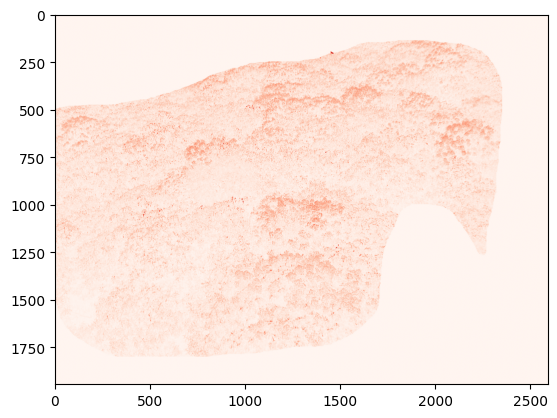

In [ ]:
plt.imshow(img_array_ir)
plt.imshow(img_array_color[:,:,0],cmap='Reds')


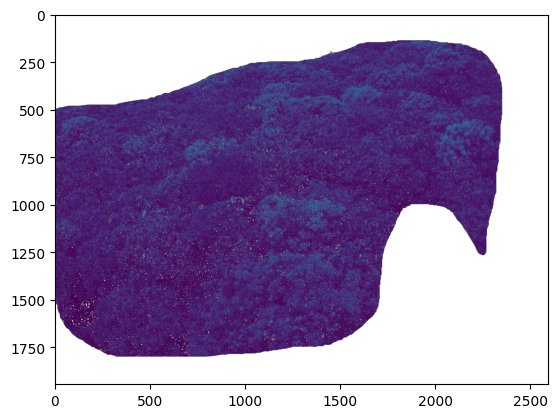

In [ ]:

masked_array_color = ma.masked_where(img_array_color == 0, img_array_color)
masked_array_ir=ma.masked_where(img_array_ir==0,img_array_ir)
plt.imshow(masked_array_color[:,:,0])

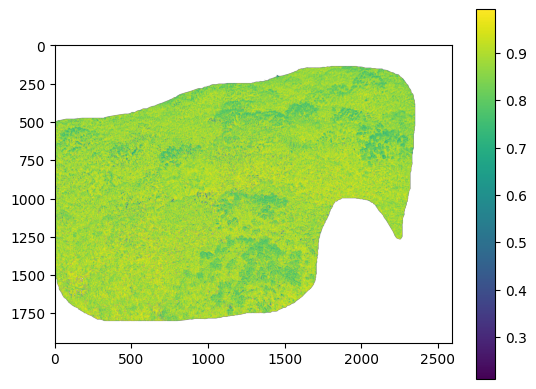

In [ ]:
ir = masked_array_ir.astype(float)
r = masked_array_color[:, :, 0].astype(float)
ndvi = (ir - r) / (ir + r)
ndvi = ma.masked_invalid(ndvi)
plt.imshow(ndvi)
plt.colorbar()

In [ ]:
print("IR mean:", ir.mean())
print("Red mean:", r.mean())
print("IR > Red pixels:", np.sum(ir > r), "out of", ir.size)

IR mean: 126.43046384699915
Red mean: 8.968361103467231
IR > Red pixels: 2954433 out of 5038848


In [ ]:
total = ma.mean(ndvi.flatten())  # Sum of non-masked values
total

np.float64(0.8732291493077047)

In [ ]:
masked_array_ir.shape

(1944, 2592)